In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('smartphone_cleaned_v5.csv')
df1 = df.copy()

In [3]:
df.shape

(980, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

In [5]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


<Axes: ylabel='brand_name'>

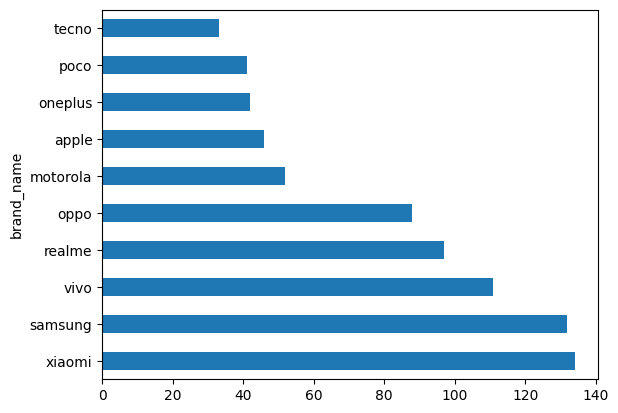

In [6]:
# top 10 brand_name

df['brand_name'].value_counts().head(10).plot(kind='barh')

#### Price

In [7]:
# price

df[['price']].describe().T.loc[:, ['mean', '50%']]

,mean,50%
price,32520.504082,19994.5


In [8]:
df[['price']].describe()

# the distribution is not normal, it is right skewed.
# there are outliers in the data

,price
count,980.000000
mean,32520.504082
std,39531.812669
min,3499.000000
25%,12999.000000
50%,19994.500000
75%,35491.500000
max,650000.000000


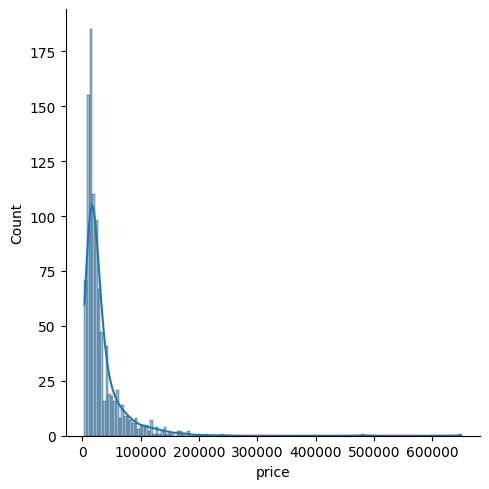

In [9]:
sns.displot(kind='hist', data=df, x='price', kde=True)

In [10]:
df['price'].skew()

6.591790999665567

<Axes: xlabel='price'>

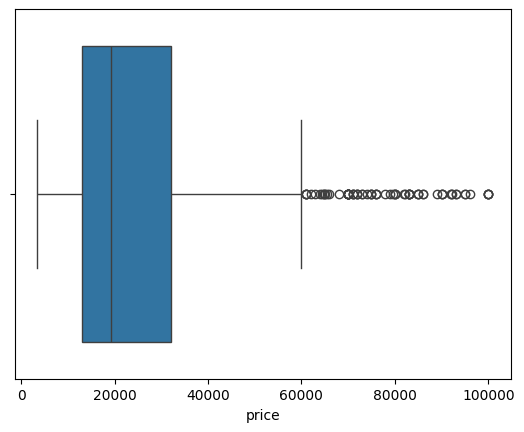

In [11]:
sns.boxplot(x=df['price'][df['price'] < 100000])

In [12]:
df[df['price'] > 200000]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
427,vertu,Vertu Signature Touch,650000,62.0,False,True,False,snapdragon,8.0,1.50,...,4.70,60,1080 x 1920,1,1.0,android,13.0,2.1,0,NaN
478,huawei,Huawei Mate 50 RS Porsche Design,239999,81.0,False,True,True,snapdragon,8.0,3.20,...,6.74,120,1212 x 2616,3,1.0,other,50.0,13.0,1,256.0
887,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,False,True,False,snapdragon,8.0,2.80,...,6.39,60,1080 x 2340,3,1.0,android,48.0,20.0,0,NaN
951,huawei,Huawei Mate 30 RS Porsche Design,214990,NaN,True,True,True,kirin,8.0,2.86,...,6.53,60,1176 x 2400,4,2.0,android,40.0,32.0,1,256.0


#### Rating

In [13]:
df['rating'].describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

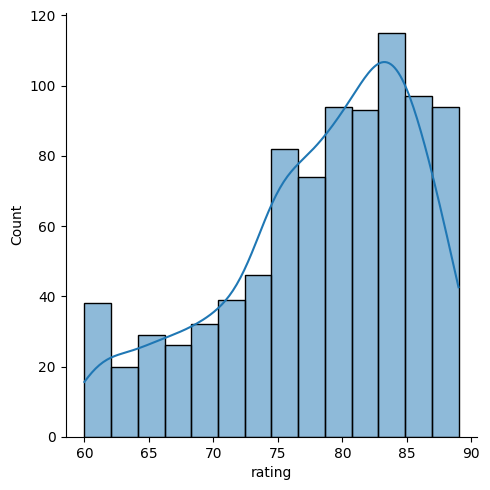

In [14]:
sns.displot(kind='hist', data=df, x='rating', kde=True)

In [15]:
df['rating'].skew()

-0.6989993034105535

<Axes: xlabel='rating'>

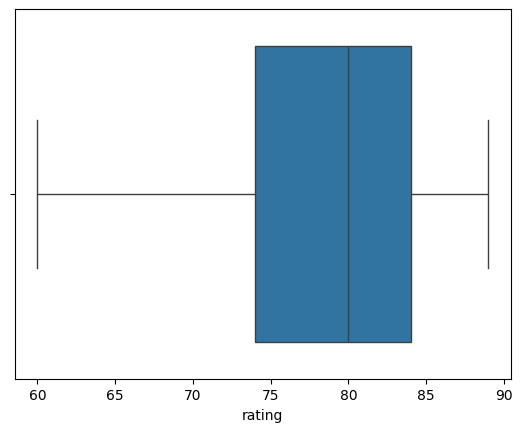

In [16]:
sns.boxplot(x=df['rating'])

<Axes: ylabel='count'>

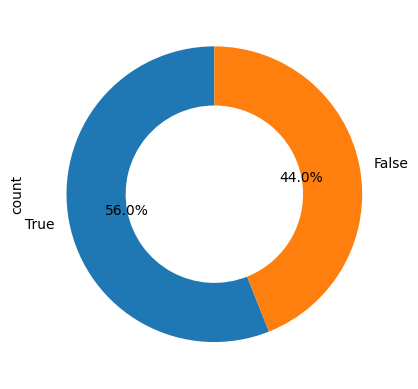

In [17]:
df['has_5g'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))

<Axes: ylabel='count'>

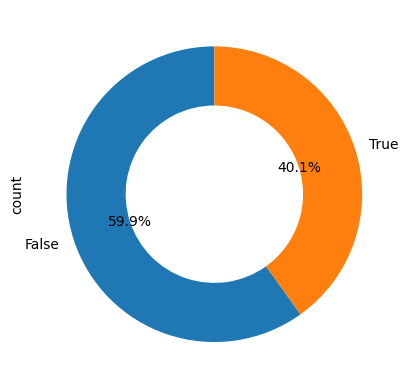

In [18]:
df['has_nfc'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))

<Axes: ylabel='count'>

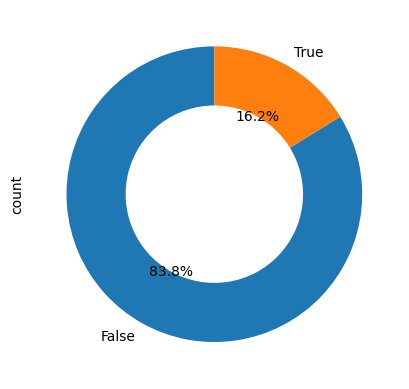

In [19]:
df['has_ir_blaster'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))

In [20]:
def vc_with_pct(df, feature):
    return pd.DataFrame(
        {'count': df[feature].value_counts(),
        'pct':round(df[feature].value_counts(normalize=True)*100,2).astype(str) + ' %'}
    )

In [21]:
vc_with_pct(df, 'processor_brand')

,count,pct
processor_brand,,
snapdragon,413,43.02 %
helio,201,20.94 %
dimensity,177,18.44 %
exynos,50,5.21 %
bionic,45,4.69 %
unisoc,26,2.71 %
tiger,24,2.5 %
google,9,0.94 %
kirin,7,0.73 %


In [22]:
vc_with_pct(df, 'num_cores')

,count,pct
num_cores,,
8.0,899,92.3 %
6.0,39,4.0 %
4.0,36,3.7 %


In [23]:
def donut_chart(df, feature, width=0.4):
	  return df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops=dict(width=width))

<Axes: ylabel='count'>

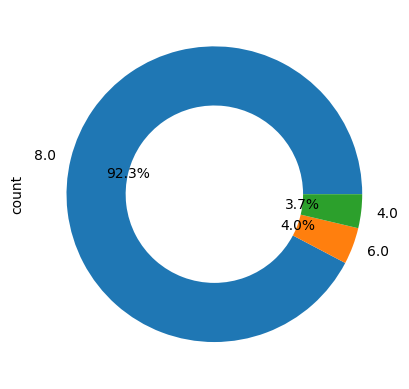

In [24]:
donut_chart(df, feature='num_cores')

<Axes: ylabel='count'>

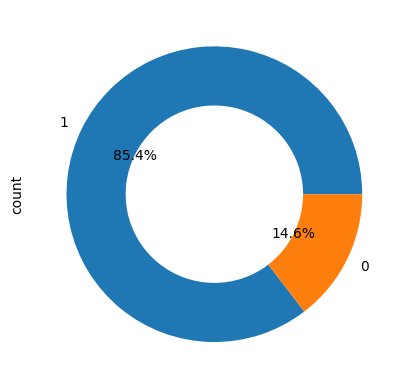

In [25]:
donut_chart(df, feature='fast_charging_available')

In [26]:
vc_with_pct(df, 'ram_capacity')

,count,pct
ram_capacity,,
8.0,339,34.59 %
6.0,234,23.88 %
4.0,217,22.14 %
12.0,86,8.78 %
3.0,54,5.51 %
2.0,32,3.27 %
16.0,9,0.92 %
1.0,7,0.71 %
18.0,2,0.2 %


<Axes: ylabel='count'>

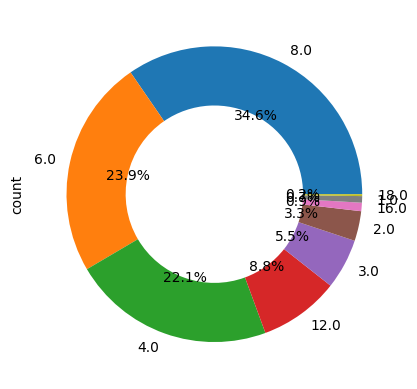

In [27]:
donut_chart(df, feature='ram_capacity')

In [28]:
vc_with_pct(df, 'internal_memory')

,count,pct
internal_memory,,
128.0,523,53.37 %
64.0,193,19.69 %
256.0,157,16.02 %
32.0,67,6.84 %
512.0,22,2.24 %
16.0,12,1.22 %
1024.0,5,0.51 %
8.0,1,0.1 %


<Axes: ylabel='count'>

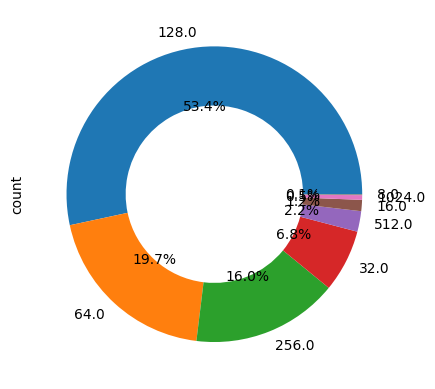

In [29]:
donut_chart(df, feature='internal_memory')

In [30]:
vc_with_pct(df, 'refresh_rate')

,count,pct
refresh_rate,,
60,368,37.55 %
120,344,35.1 %
90,219,22.35 %
144,39,3.98 %
165,9,0.92 %
240,1,0.1 %


<Axes: ylabel='count'>

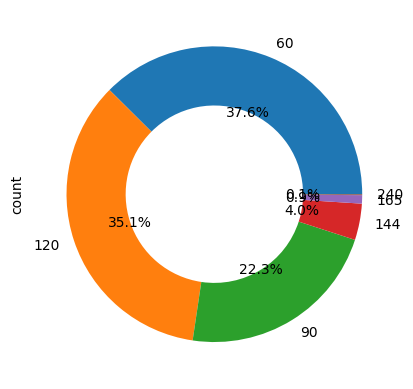

In [31]:
donut_chart(df, feature='refresh_rate')

In [32]:
vc_with_pct(df, 'os')

,count,pct
os,,
android,909,94.1 %
ios,46,4.76 %
other,11,1.14 %


<Axes: ylabel='count'>

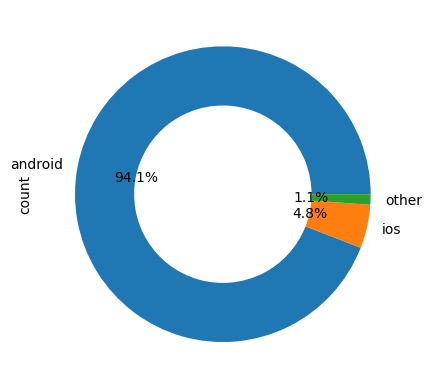

In [33]:
donut_chart(df, feature='os')

# Bi-variate Analysis

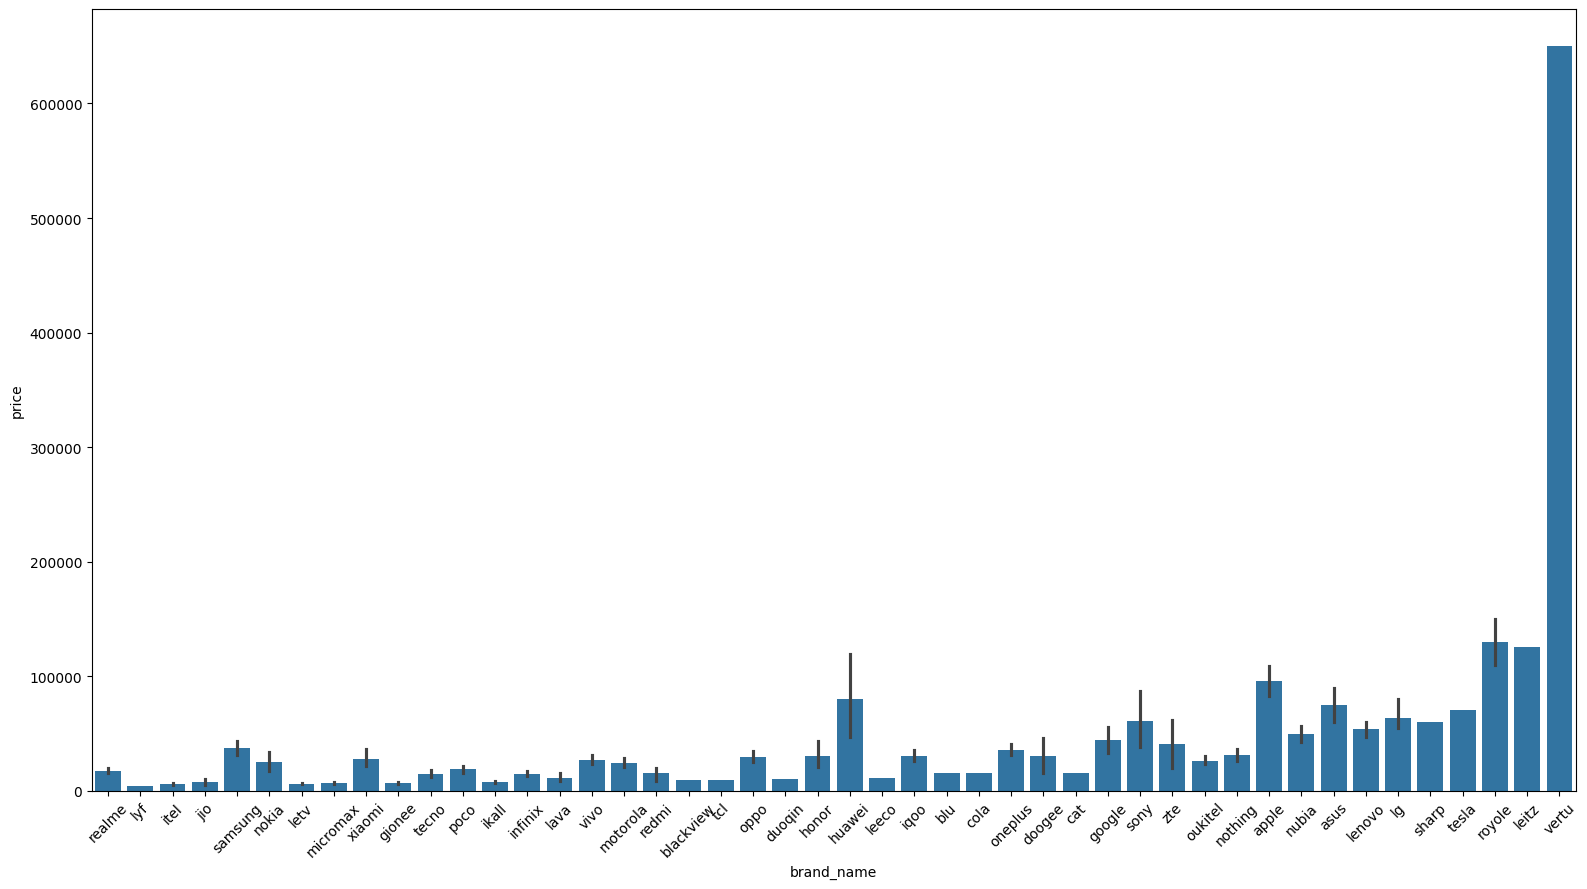

In [34]:
df_sorted = df.sort_values(by='price', ascending=True)
plt.figure(figsize=(16,9))
sns.barplot(data=df_sorted, x='brand_name', y='price')
plt.xticks(rotation=45)
plt.tight_layout();

In [35]:
df.sample()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
167,iqoo,iQOO 9 SE 5G,30990,83.0,True,True,False,snapdragon,8.0,2.84,...,6.62,120,1080 x 2400,3,1.0,android,48.0,16.0,0,NaN


In [36]:
x = df.groupby(['brand_name'])['brand_name'].count()

<Axes: ylabel='brand_name'>

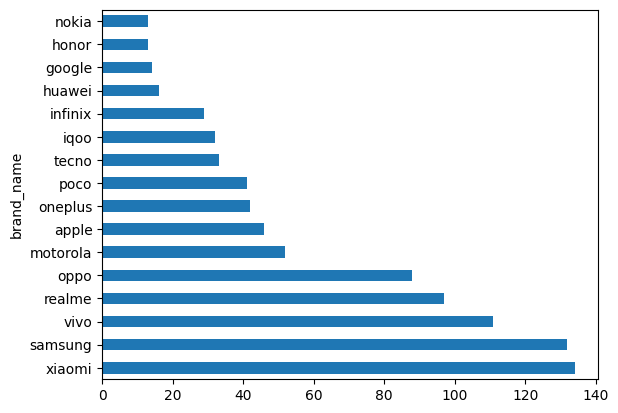

In [37]:
x[x >10].sort_values(ascending=False).plot(kind='barh')

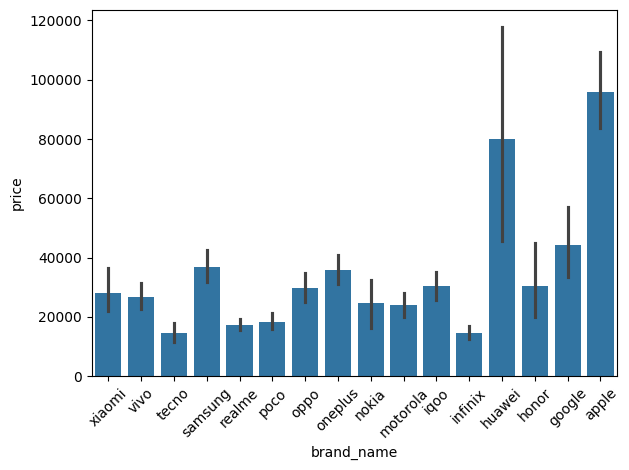

In [38]:
greater_than_10 = df[df['brand_name'].isin(x[x >10].index)]
sorted = greater_than_10.sort_values(by=['brand_name','price'], ascending=False)
plt.figure()
sns.barplot(data=sorted , x='brand_name', y='price')
plt.xticks(rotation=45)
plt.tight_layout();

<Axes: xlabel='price', ylabel='rating'>

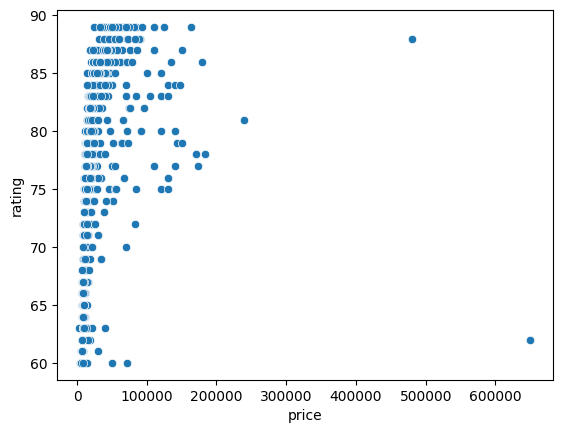

In [39]:
sns.scatterplot(data=df, y='rating', x='price')

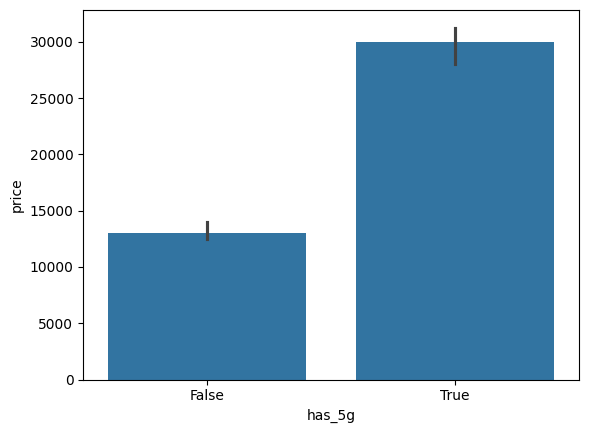

In [40]:
sns.barplot(data=greater_than_10, x='has_5g',y='price', estimator=np.median);

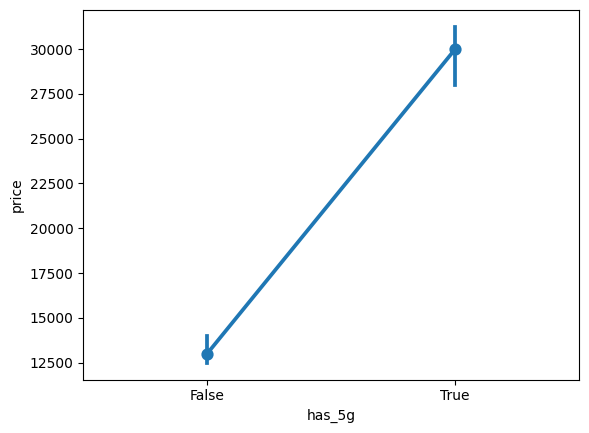

In [41]:
sns.pointplot(data=greater_than_10, x='has_5g',y='price', estimator=np.median);

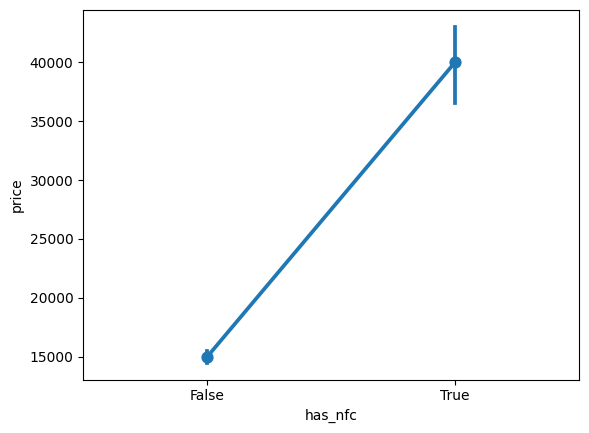

In [42]:
sns.pointplot(data=greater_than_10, x='has_nfc',y='price', estimator=np.median);

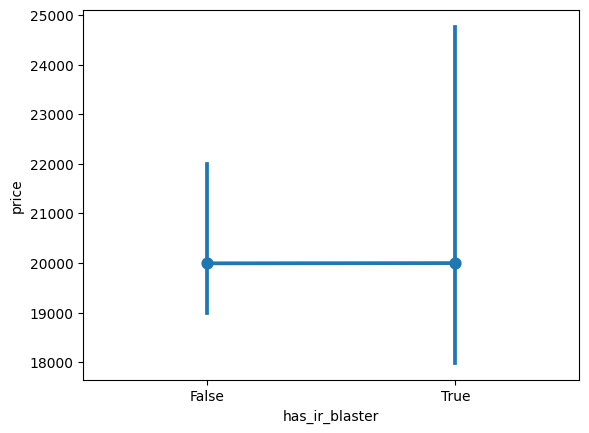

In [43]:
sns.pointplot(data=greater_than_10, x='has_ir_blaster',y='price', estimator=np.median);

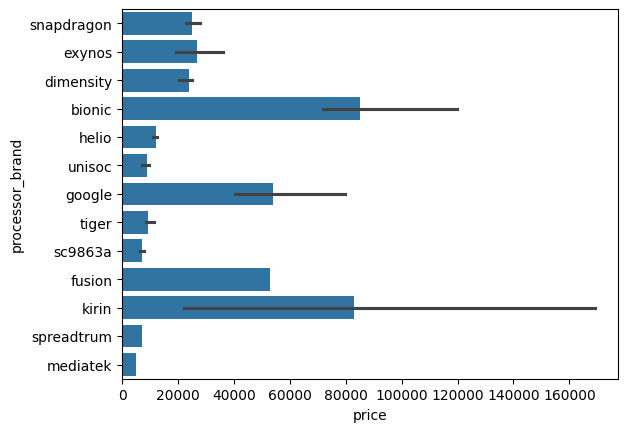

In [49]:
sns.barplot(data=greater_than_10, y='processor_brand',x='price', estimator=np.median);

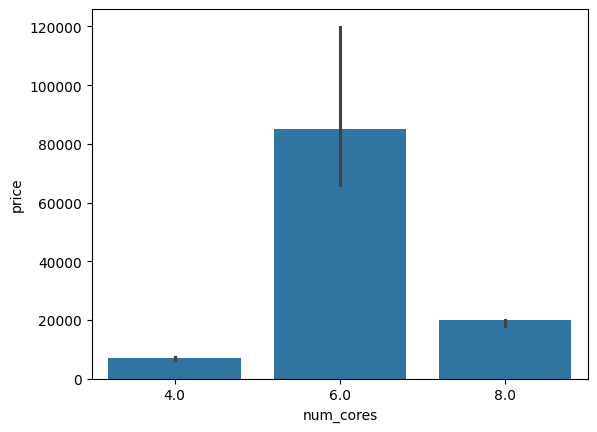

In [50]:
sns.barplot(data=greater_than_10, x='num_cores',y='price', estimator=np.median);

In [51]:
pd.crosstab(df.num_cores, df.os)

os,android,ios,other
num_cores,,,
4.0,33,1,1
6.0,0,39,0
8.0,875,1,10


<Axes: xlabel='processor_speed', ylabel='price'>

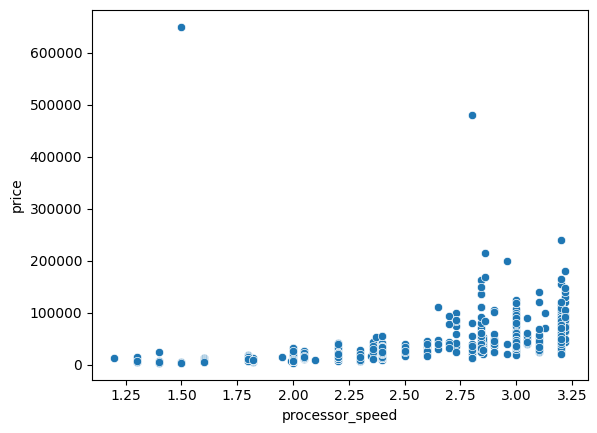

In [55]:
sns.scatterplot(data=df, x='processor_speed', y='price')

<Axes: xlabel='screen_size', ylabel='price'>

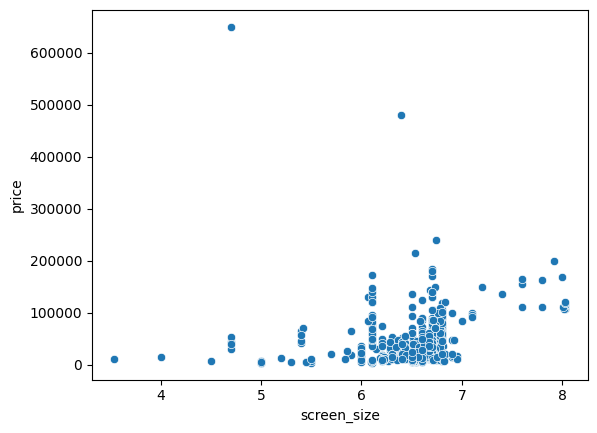

In [56]:
sns.scatterplot(data=df, x='screen_size', y='price')

<Axes: >

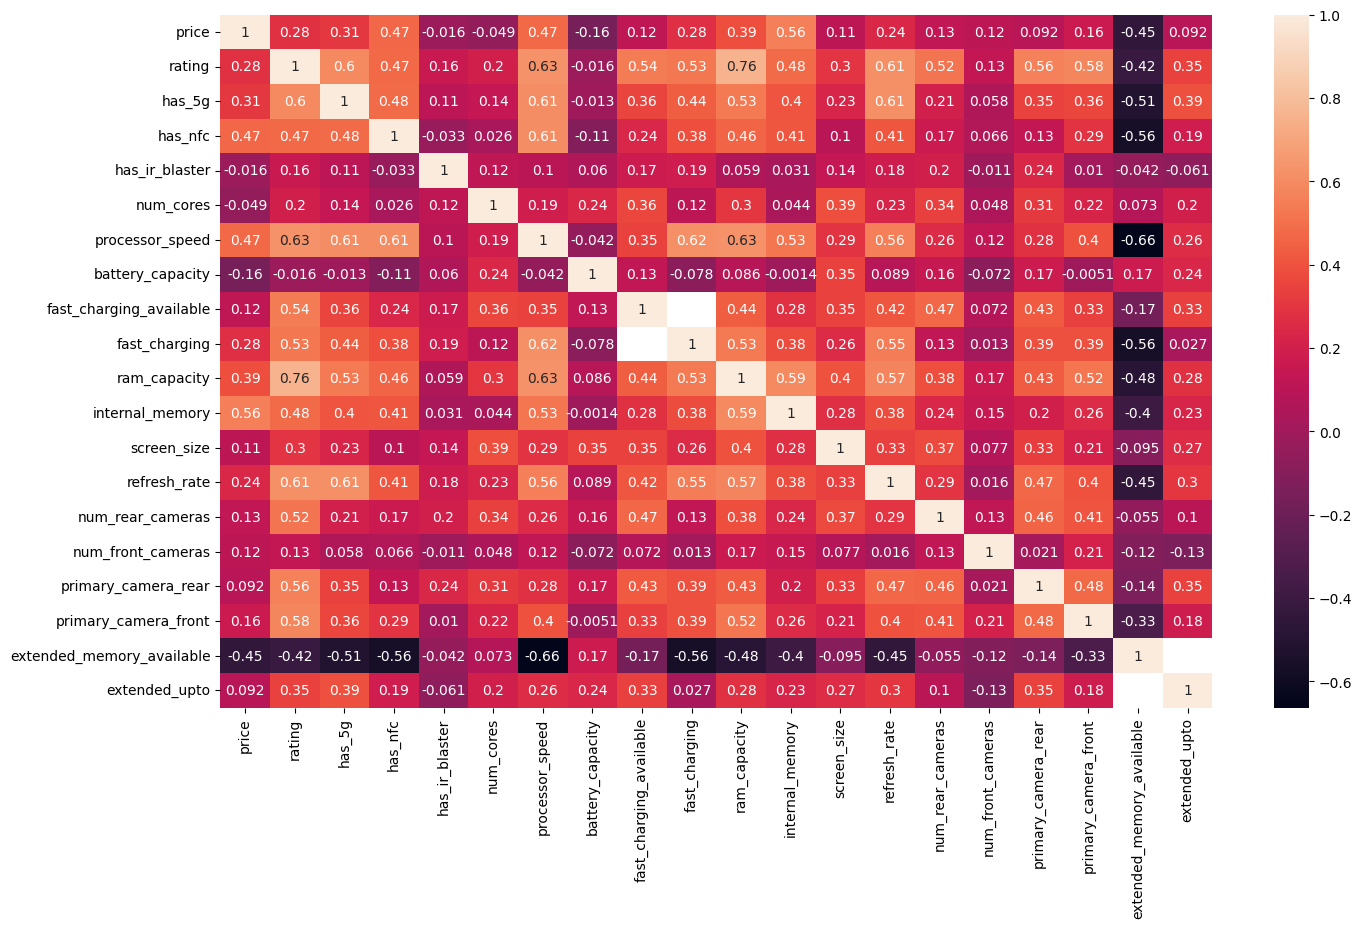

In [62]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [65]:
df.corr(numeric_only=True)['price'].sort_values(ascending=False)

price                        1.000000
internal_memory              0.557168
processor_speed              0.474049
has_nfc                      0.470951
ram_capacity                 0.386002
has_5g                       0.305066
rating                       0.283504
fast_charging                0.277591
refresh_rate                 0.244115
primary_camera_front         0.162995
num_rear_cameras             0.125330
fast_charging_available      0.116739
num_front_cameras            0.115228
screen_size                  0.113253
primary_camera_rear          0.092095
extended_upto                0.091945
has_ir_blaster              -0.015807
num_cores                   -0.048561
battery_capacity            -0.159232
extended_memory_available   -0.448628
Name: price, dtype: float64

In [67]:
# knn imputer

df.shape

(980, 25)

In [71]:
knn_df = df.select_dtypes(include=['int64', 'float64']).drop(columns='price')

In [72]:
from sklearn.impute import KNNImputer

In [73]:
imputer = KNNImputer(n_neighbors=5)

In [76]:
knn_df_values = imputer.fit_transform(knn_df)

In [80]:
knn_df = pd.DataFrame(knn_df_values, columns=knn_df.columns)

In [81]:
knn_df['price'] = df['price']

In [86]:
a = knn_df.corr()['price'].reset_index()

In [90]:
b = df.corr(numeric_only=True)['price'].reset_index()

In [92]:
b.merge(a, on='index')

,index,price_x,price_y
0,price,1.000000,1.000000
1,rating,0.283504,0.341727
2,num_cores,-0.048561,-0.055949
3,processor_speed,0.474049,0.488426
4,battery_capacity,-0.159232,-0.166257
5,fast_charging_available,0.116739,0.116739
6,fast_charging,0.277591,0.220688
7,ram_capacity,0.386002,0.386002
8,internal_memory,0.557168,0.557168
9,screen_size,0.113253,0.113253
